C:\Users\rlaqhdrb\anaconda3\envs\ox\Lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Users\rlaqhdrb\anaconda3\envs\ox\Lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\rlaqhdrb\anaconda3\envs\ox\Lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\rlaqhdrb\anaconda3\envs\ox\Lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-par

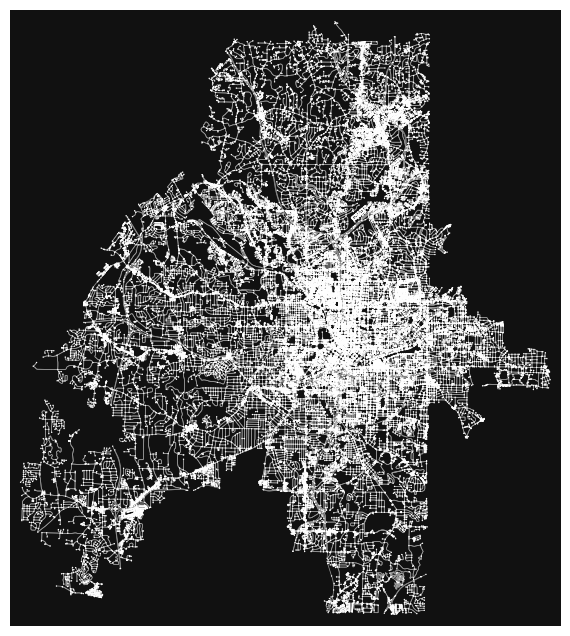

In [4]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

ox.config(use_cache=True, log_console=True)
ox.__version__

G = ox.graph_from_place("Atlanta", network_type="all", simplify=False)
G = ox.simplify_graph(G, strict=False)
fig, ax = ox.plot_graph(G, node_size=1, edge_linewidth=0.5)

node_id = list(G.nodes)

node_lon = []
node_lat = []

for i in range (len(node_id)):
    node_lon.append(G.nodes[node_id[i]]['x'])
    node_lat.append(G.nodes[node_id[i]]['y'])
    
numset = []

for i in range (len(node_id)):
    numset.append(i)
    
edge_list = []

edge_src = []
edge_dst = []

for i in range (len(list(G.edges))):
    edge_src.append(list(G.edges)[i][0])
    edge_dst.append(list(G.edges)[i][1])

In [5]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
edges_series = edges['length'] #gives you a pandas series with edge lengths
edge_length = list(edges_series)

In [10]:
edge_dict = {}
edge_dict_dst = {}

edge_src1 = set(edge_src)
edge_src1 = list(edge_src1)
edge_src1.sort()

edge_dst1 = set(edge_dst)
edge_dst1 = list(edge_dst1)
edge_dst1.sort()

for j in range (len(edge_src1)):
    edge_dict[edge_src1[j]] = j
    
for k in range (len(edge_dst1)):
    edge_dict_dst[edge_dst1[k]] = k 

In [11]:
edge_src_li = []

for i in range (len(edge_src)):
    edge_src_li.append(edge_dict[edge_src[i]])
    
edge_dst_li = []

for j in range (len(edge_dst)):
    edge_dst_li.append(edge_dict_dst[edge_dst[j]])

In [12]:
node_lon = []
node_lat = []

for i in range (len(node_id)):
    node_lon.append(G.nodes[node_id[i]]['x'])
    node_lat.append(G.nodes[node_id[i]]['y'])

In [13]:
index = []
for i in range (len(node_lat)):
    index.append(i)

In [15]:
import pandas as pd


df = pd.DataFrame(index, columns = ['id'])
df['lon'] = node_lon
df['lat'] = node_lat

df.to_csv('AtlantaNode.csv', index=False)

In [16]:
df = pd.DataFrame(edge_src_li, columns = ['src'])
df['dst'] = edge_dst_li
df['weight'] = edge_length

df.to_csv('AtlantaEdge.csv', index=False)

In [18]:
for i in range (len(edge_src_li)):
    if edge_src_li[i]==edge_dst_li[i]:
        print(i+2)

2
1634
2073
2173
2190
2218
2235
2247
2251
2259
2266
2559
2560
2681
2682
2890
2891
3015
3016
3387
3388
3499
3515
3530
3532
3536
3552
3661
3662
3834
3840
3851
3872
3886
3891
3897
3911
3912
3924
3928
3933
3937
3945
3947
3955
3965
3975
3976
4003
4011
4013
4022
4161
5375
6065
6765
7523
7744
10281
13380
13422
13467
13839
13842
15116
16852
17788
19272
20839
23464
23777
23848
27759
28516
28519
28525
28562
28599
28604
28622
28623
28624
28625
28627
28629
28632
28644
28647
28678
28681
28690
28692
28711
28717
28764
28770
28780
28852
28855
28872
28906
28911
28926
28958
29017
29066
29078
29093
29146
29198
29223
29227
29301
29313
29324
29333
29339
29342
29351
29372
29386
29449
29460
29484
29497
29514
29541
29589
29606
29615
29629
29648
29739
29750
29759
29822
29846
29868
29905
29911
29919
29924
29943
29954
29976
30069
30070
30077
30095
30154
30158
30178
30193
30208
30667
30668
31083
31084
31139
31140
31147
31148
31181
31182
31185
31186
31246
31247
31275
31276
31294
31298
31302
31371
31377
31384
31385